# Loading the data

In [1]:
pip install congreso

Note: you may need to restart the kernel to use updated packages.


In [2]:
from congreso import congreso as c #(after installing this library)
import pandas as pd
from matplotlib import pyplot as plt

terms = ["XV", "XIV", "X", "VII"]
t = c.load_jsons(terms)

fields = c.get_all_fields(t["XV"])
print(fields)

['fecha', 'seri', 'fecha_mensaje', 'encabezado', 'desu', 'desu1', 'desu2', 'texto', 'pdf_url', 'legislatura', 'numdoc', 'cve', 'orga', 'secc', 'subi', 'ndia', 'mensaje', 'id']


# Simple functions

Functions created to simplify my analisis previous to the actual segmentation code. 
For this I included a function to filter only Diario de sessiones documents, since I don't want laws or monetary declarations from the MPs, I only want the interaction and actuall debate.

In [4]:
def filter_DS_documents(term_dictionary):
  DS_term = []
  for doc in term_dictionary:
    if doc["encabezado"] == "DS":
      DS_term.append(doc)
  return DS_term

In here I made a simple filter by date since the jsons are structured by term and I want them by year.

In [5]:
def get_period(terms, lower_date = "0", upper_date = "99999999"):
  period = []
  for term in terms:
    for doc in term:
      if doc["fecha"] >= lower_date and doc["fecha"] <= upper_date:
        period.append(doc)
  return period

Here I use a function I created on the congreso pypi library to get the unique values on the field secc which stands for section.

In [6]:
display(c.display_field_values(t['VII'], "secc"))
display(c.display_field_values(t['X'], "secc"))
display(c.display_field_values(t['XIV'], "secc"))
display(c.display_field_values(t['XV'], "secc"))

,secc,Number of Documents
0,CONGRESO DE LOS DIPUTADOS,6392
1,SENADO,3629
2,CORTES GENERALES,771
3,,2
4,Senado,1


,secc,Number of Documents
0,SENADO,4788
1,CONGRESO DE LOS DIPUTADOS,2797
2,CONGRESO,1214
3,CORTES GENERALES,766


,secc,Number of Documents
0,SENADO,4495
1,CONGRESO DE LOS DIPUTADOS,2508
2,CONGRESO,1209
3,CORTES GENERALES,649
4,SENADO,1


,secc,Number of Documents
0,SENADO,1196
1,CONGRESO DE LOS DIPUTADOS,393
2,CONGRESO,146
3,CORTES GENERALES,140


### Filter documents by their SECC (to only keep congreso documents)

In [7]:
def filter_cong_documents(term_dictionary):
  cong_term = []
  for doc in term_dictionary:
    if (doc["secc"] == "CONGRESO") or (doc["secc"] == "CONGRESO DE LOS DIPUTADOS"):
      cong_term.append(doc)
  return cong_term

### Filter documents only from Congreso Plenos

Here I will only get documents from 2022 since it is the most recent full stack of documents we have from parlamint. Then I'll filter by secc and finally by organ. But first of course I need to know if the only way they refere to pleno is simply "Pleno", because they tend to have consistency trouble. It turns out they did this right and Pleno is just Pleno.

In [17]:
display(c.display_field_values(t['XIV'], "seri"))
display(c.display_field_values(t['XIV'], "secc"))
display(c.display_field_values(t['XIV'], "orga"))

,seri,Number of Documents
0,Comisiones,1400
1,I,1216
2,A,1004
3,II,965
4,IV,913
5,B,911
6,D,643
7,III,449
8,C,418
9,VI,308


,secc,Number of Documents
0,SENADO,4495
1,CONGRESO DE LOS DIPUTADOS,2508
2,CONGRESO,1209
3,CORTES GENERALES,649
4,SENADO,1


,orga,Number of Documents
0,,6839
1,Pleno,396
2,Comisión de Sanidad y Consumo,99
3,Comisión de Justicia,74
4,Comisión de Asuntos Económicos y Transformació...,68
...,...,...
63,Comisión conjunta de la Comisión de Transición...,1
64,Sesiones Conjuntas,1
65,Comisión de Investigación relativa a la gestió...,1
66,Comisión de Investigación sobre las actuacione...,1


In [23]:
XIV = t['XIV']
docs_2022 = filter_DS_documents(c.get_documents_interval_dates(XIV, "20220101", "20221231"))

cong1_term = []
for doc in docs_2022:
    if (doc["secc"] == "CONGRESO") or (doc["secc"] == "CONGRESO DE LOS DIPUTADOS"):
        cong1_term.append(doc)

count = 0
cong_pleno = []
for doc in cong1_term:
    if doc["orga"] == "Pleno":
        count += 1
        cong_pleno.append(doc)

# Sort cong_pleno by "fecha" in ascending order
cong_pleno_sorted = sorted(cong_pleno, key=lambda x: x['fecha'])

print(f"Total Pleno documents: {count}")

# Display the specified fields for each dictionary in cong_pleno_sorted
for doc in cong_pleno_sorted:
    display(f"Fecha: {doc['fecha']}, URL: {doc['pdf_url']}, seri: {doc['seri']}, fecha_mensaje: {doc['fecha_mensaje']}, encabezado: {doc['encabezado']}")


Total Pleno documents: 84


'Fecha: 20220125, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-153.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 25/01/2022, encabezado: DS'

'Fecha: 20220201, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-154.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 01/02/2022, encabezado: DS'

'Fecha: 20220202, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-155.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 02/02/2022, encabezado: DS'

'Fecha: 20220203, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-156.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 03/02/2022, encabezado: DS'

'Fecha: 20220215, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-157.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 15/02/2022, encabezado: DS'

'Fecha: 20220216, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-158.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 16/02/2022, encabezado: DS'

'Fecha: 20220217, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-159.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 17/02/2022, encabezado: DS'

'Fecha: 20220222, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-160.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 22/02/2022, encabezado: DS'

'Fecha: 20220223, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-161.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 23/02/2022, encabezado: DS'

'Fecha: 20220224, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-162.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 24/02/2022, encabezado: DS'

'Fecha: 20220302, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-163.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 02/03/2022, encabezado: DS'

'Fecha: 20220308, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-164.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 08/03/2022, encabezado: DS'

'Fecha: 20220309, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-165.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 09/03/2022, encabezado: DS'

'Fecha: 20220310, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-166.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 10/03/2022, encabezado: DS'

'Fecha: 20220315, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-167.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 15/03/2022, encabezado: DS'

'Fecha: 20220316, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-168.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 16/03/2022, encabezado: DS'

'Fecha: 20220317, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-169.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 17/03/2022, encabezado: DS'

'Fecha: 20220322, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-170.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 22/03/2022, encabezado: DS'

'Fecha: 20220323, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-171.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 23/03/2022, encabezado: DS'

'Fecha: 20220324, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-172.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 24/03/2022, encabezado: DS'

'Fecha: 20220329, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-173.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 29/03/2022, encabezado: DS'

'Fecha: 20220330, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-174.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 30/03/2022, encabezado: DS'

'Fecha: 20220331, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-175.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 31/03/2022, encabezado: DS'

'Fecha: 20220405, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-176.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 05/04/2022, encabezado: DS'

'Fecha: 20220406, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-177.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 06/04/2022, encabezado: DS'

'Fecha: 20220407, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-178.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 07/04/2022, encabezado: DS'

'Fecha: 20220426, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-179.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 26/04/2022, encabezado: DS'

'Fecha: 20220427, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-180.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 27/04/2022, encabezado: DS'

'Fecha: 20220428, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-182.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 28/04/2022, encabezado: DS'

'Fecha: 20220428, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-181.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 28/04/2022, encabezado: DS'

'Fecha: 20220510, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-183.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 10/05/2022, encabezado: DS'

'Fecha: 20220511, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-184.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 11/05/2022, encabezado: DS'

'Fecha: 20220512, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-185.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 12/05/2022, encabezado: DS'

'Fecha: 20220517, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-186.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 17/05/2022, encabezado: DS'

'Fecha: 20220518, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-187.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 18/05/2022, encabezado: DS'

'Fecha: 20220524, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-188.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 24/05/2022, encabezado: DS'

'Fecha: 20220525, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-189.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 25/05/2022, encabezado: DS'

'Fecha: 20220526, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-190.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 26/05/2022, encabezado: DS'

'Fecha: 20220607, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-191.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 07/06/2022, encabezado: DS'

'Fecha: 20220608, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-192.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 08/06/2022, encabezado: DS'

'Fecha: 20220609, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-193.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 09/06/2022, encabezado: DS'

'Fecha: 20220621, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-194.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 21/06/2022, encabezado: DS'

'Fecha: 20220622, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-195.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 22/06/2022, encabezado: DS'

'Fecha: 20220623, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-196.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 23/06/2022, encabezado: DS'

'Fecha: 20220628, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-197.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 28/06/2022, encabezado: DS'

'Fecha: 20220629, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-198.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 29/06/2022, encabezado: DS'

'Fecha: 20220630, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-199.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 30/06/2022, encabezado: DS'

'Fecha: 20220712, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-200.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 12/07/2022, encabezado: DS'

'Fecha: 20220713, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-201.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 13/07/2022, encabezado: DS'

'Fecha: 20220714, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-202.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 14/07/2022, encabezado: DS'

'Fecha: 20220825, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-204.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 25/08/2022, encabezado: DS'

'Fecha: 20220913, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-205.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 13/09/2022, encabezado: DS'

'Fecha: 20220914, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-206.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 14/09/2022, encabezado: DS'

'Fecha: 20220915, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-207.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 15/09/2022, encabezado: DS'

'Fecha: 20220920, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-208.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 20/09/2022, encabezado: DS'

'Fecha: 20220921, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-209.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 21/09/2022, encabezado: DS'

'Fecha: 20220922, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-210.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 22/09/2022, encabezado: DS'

'Fecha: 20220927, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-211.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 27/09/2022, encabezado: DS'

'Fecha: 20220928, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-212.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 28/09/2022, encabezado: DS'

'Fecha: 20220929, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-213.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 29/09/2022, encabezado: DS'

'Fecha: 20221004, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-214.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 04/10/2022, encabezado: DS'

'Fecha: 20221005, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-215.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 05/10/2022, encabezado: DS'

'Fecha: 20221006, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-216.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 06/10/2022, encabezado: DS'

'Fecha: 20221013, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-217.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 13/10/2022, encabezado: DS'

'Fecha: 20221026, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-218.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 26/10/2022, encabezado: DS'

'Fecha: 20221027, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-219.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 27/10/2022, encabezado: DS'

'Fecha: 20221102, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-220.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 02/11/2022, encabezado: DS'

'Fecha: 20221103, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-221.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 03/11/2022, encabezado: DS'

'Fecha: 20221121, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-222.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 21/11/2022, encabezado: DS'

'Fecha: 20221122, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-223.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 22/11/2022, encabezado: DS'

'Fecha: 20221123, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-224.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 23/11/2022, encabezado: DS'

'Fecha: 20221124, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-225.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 24/11/2022, encabezado: DS'

'Fecha: 20221124, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-226.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 24/11/2022, encabezado: DS'

'Fecha: 20221129, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-227.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 29/11/2022, encabezado: DS'

'Fecha: 20221130, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-228.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 30/11/2022, encabezado: DS'

'Fecha: 20221201, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-229.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 01/12/2022, encabezado: DS'

'Fecha: 20221201, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-230.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 01/12/2022, encabezado: DS'

'Fecha: 20221213, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-231.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 13/12/2022, encabezado: DS'

'Fecha: 20221214, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-232.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 14/12/2022, encabezado: DS'

'Fecha: 20221215, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-233.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 15/12/2022, encabezado: DS'

'Fecha: 20221215, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-234.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 15/12/2022, encabezado: DS'

'Fecha: 20221220, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-235.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 20/12/2022, encabezado: DS'

'Fecha: 20221221, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-236.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 21/12/2022, encabezado: DS'

'Fecha: 20221222, URL: /public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-237.PDF, seri: Pleno y Diputación Permanente, fecha_mensaje: de 22/12/2022, encabezado: DS'

# Previous study of 2003, 2013, 2023

In [ ]:
#Get documents on 2003, 2013, 2023
VII = t['VII']
docs_2003 = filter_DS_documents(c.get_documents_interval_dates(VII, "20030101", "20031231"))

X = t['X']
docs_2013 = filter_DS_documents(c.get_documents_interval_dates(X, "20130101", "20131231"))

XIV = t['XIV']
XV = t['XV']
docs_2023_XIV = filter_DS_documents(c.get_documents_interval_dates(XIV, "20230101", "20231231"))
docs_2023_XV = filter_DS_documents(c.get_documents_interval_dates(XV, "20230101", "20231231"))
docs_2023 = docs_2023_XIV + docs_2023_XV

In [ ]:
print("Docs 2003 filtered =",c.num_docs_term(docs_2003))
print("Docs 2013 filtered =",c.num_docs_term(docs_2013))
print("Docs 2023 filtered =",c.num_docs_term(docs_2023))

Docs 2003 filtered = 580
Docs 2013 filtered = 572
Docs 2023 filtered = 292


In [ ]:
cong_docs_2003 = filter_cong_documents(docs_2003)
cong_docs_2013 = filter_cong_documents(docs_2013)
cong_docs_2023 = filter_cong_documents(docs_2023)

In [ ]:
print("Docs 2003 filtered =",c.num_docs_term(cong_docs_2003))
print("Docs 2013 filtered =",c.num_docs_term(cong_docs_2013))
print("Docs 2023 filtered =",c.num_docs_term(cong_docs_2023))

Docs 2003 filtered = 320
Docs 2013 filtered = 328
Docs 2023 filtered = 150


Average document length for 2003: 197780.28
Average document length for 2013: 192731.37
Average document length for 2023: 152062.95


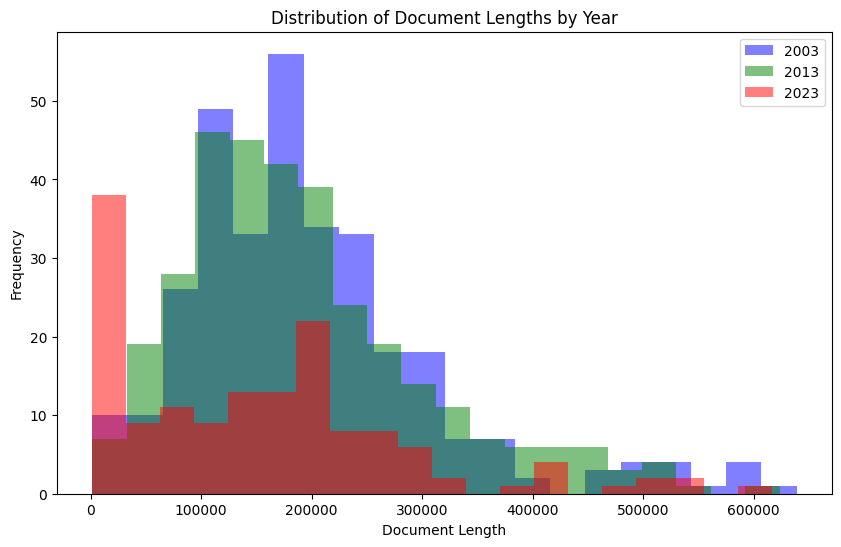

In [ ]:
import matplotlib.pyplot as plt

# Apply the add_texto_length function to each document list
cong_docs_2003 = c.add_texto_length(cong_docs_2003)
cong_docs_2013 = c.add_texto_length(cong_docs_2013)
cong_docs_2023 = c.add_texto_length(cong_docs_2023)

# Extract 'texto_length' for each document in each term
doc_lengths_2003 = [doc['texto_length'] for doc in cong_docs_2003]
doc_lengths_2013 = [doc['texto_length'] for doc in cong_docs_2013]
doc_lengths_2023 = [doc['texto_length'] for doc in cong_docs_2023]

# Calculate average length per document for each term
avg_length_2003 = sum(doc_lengths_2003) / len(doc_lengths_2003)
avg_length_2013 = sum(doc_lengths_2013) / len(doc_lengths_2013)
avg_length_2023 = sum(doc_lengths_2023) / len(doc_lengths_2023)

# Print average lengths
print(f"Average document length for 2003: {avg_length_2003:.2f}")
print(f"Average document length for 2013: {avg_length_2013:.2f}")
print(f"Average document length for 2023: {avg_length_2023:.2f}")

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(doc_lengths_2003, bins=20, color='blue', alpha=0.5, label='2003')
plt.hist(doc_lengths_2013, bins=20, color='green', alpha=0.5, label='2013')
plt.hist(doc_lengths_2023, bins=20, color='red', alpha=0.5, label='2023')
plt.xlabel("Document Length")
plt.ylabel("Frequency")
plt.title("Distribution of Document Lengths by Year")
plt.legend()
plt.show()


Now we have all the session diaries od el Congreso de los Diputados. As you can see ther's not much documents to work with, but they are all quite long so let's trust the process

## Data analysis: key word anaysis

### We will start by filtering the words we filtered on the 2023 example;
- Masculino genérico: diputados, diputadas,los ciudadanos, las ciudadanas, la ciudadanía...
- Violencia política por razon de genero: zorra, mujer, chavala, tonta,...

This function returns the weighted sum of mentions of the term you want on each of the 3 years of study.

In [ ]:
def wordcount(word, list_docs):
    count = []
    for doc in list_docs:
        mentions = c.mentions_per_doc(word, doc)  # Get mentions per document
        avg_mentions = sum(mentions) / len(mentions)  # Calculate average for each term
        count.append(avg_mentions)  # Append the average count for each year
    return count


list_docs = [cong_docs_2003, cong_docs_2013, cong_docs_2023]
doc_names = ["2003", "2013", "2023"]
words = ["los y las ciudadanas", "los ciudadanos", "las ciudadanas",
         "las ciudadanas y los ciudadanos", "los ciudadanos y las ciudadanas",
         "la ciudadanía", "zorra", "tonta", "chavala", "mujer", "hombre"]

# Calculate and print weighted mentions per term, including document collection names
for word in words:
    weighted_counts = wordcount(word, list_docs)
    print()
    for doc_name, weighted_count in zip(doc_names, weighted_counts):
        print(f"{doc_name} mentions of '{word}': {weighted_count:.5f}")




2003 mentions of 'los y las ciudadanas': 0.00000
2013 mentions of 'los y las ciudadanas': 0.00000
2023 mentions of 'los y las ciudadanas': 0.00667

2003 mentions of 'los ciudadanos': 7.35625
2013 mentions of 'los ciudadanos': 8.71341
2023 mentions of 'los ciudadanos': 4.46667

2003 mentions of 'las ciudadanas': 0.10312
2013 mentions of 'las ciudadanas': 0.14329
2023 mentions of 'las ciudadanas': 0.22000

2003 mentions of 'las ciudadanas y los ciudadanos': 0.01875
2013 mentions of 'las ciudadanas y los ciudadanos': 0.00915
2023 mentions of 'las ciudadanas y los ciudadanos': 0.01333

2003 mentions of 'los ciudadanos y las ciudadanas': 0.02187
2013 mentions of 'los ciudadanos y las ciudadanas': 0.04268
2023 mentions of 'los ciudadanos y las ciudadanas': 0.10000

2003 mentions of 'la ciudadanía': 1.08438
2013 mentions of 'la ciudadanía': 2.15244
2023 mentions of 'la ciudadanía': 2.52000

2003 mentions of 'zorra': 0.00000
2013 mentions of 'zorra': 0.00000
2023 mentions of 'zorra': 0.00000


Now that i know that for example word tonta was used on 2003 and 2023, i can focus my search to see what was the context on which this words where mentioned

In [ ]:
pd.set_option('display.max_columns', None)

def key_docs(word, list_docs):
  for docs in list_docs:
    lista = c.key_word_search(word,docs)
    if lista:
      df = pd.DataFrame(lista)
      df = df[['pdf_url', 'fecha']]  # Only keep the 'pdf_url' and 'texto' columns

      display(df)
      print(lista[0]["pdf_url"])

list_of_docs = [cong_docs_2003, cong_docs_2013, cong_docs_2023]
key_docs(" mujer ", list_of_docs)


,pdf_url,fecha
0,/public_oficiales/L7/CONG/DS/CO/CO_675.PDF,20030123
1,/public_oficiales/L7/CONG/DS/PL/PL_221.PDF,20030204
2,/public_oficiales/L7/CONG/DS/PL/PL_222.PDF,20030205
3,/public_oficiales/L7/CONG/DS/PL/PL_223.PDF,20030206
4,/public_oficiales/L7/CONG/DS/CO/CO_682.PDF,20030206
...,...,...
90,/public_oficiales/L7/CONG/DS/PL/PL_303.PDF,20031210
91,/public_oficiales/L7/CONG/DS/CO/CO_888.PDF,20031210
92,/public_oficiales/L7/CONG/DS/CO/CO_893.PDF,20031216
93,/public_oficiales/L7/CONG/DS/CO/CO_901.PDF,20031217


/public_oficiales/L7/CONG/DS/CO/CO_675.PDF


,pdf_url,fecha
0,/public_oficiales/L10/CONG/DS/PL/DSCD-10-PL-85...,20130122
1,/public_oficiales/L10/CONG/DS/PL/DSCD-10-PL-87...,20130130
2,/public_oficiales/L10/CONG/DS/CO/DSCD-10-CO-24...,20130130
3,/public_oficiales/L10/CONG/DS/PL/DSCD-10-PL-89...,20130213
4,/public_oficiales/L10/CONG/DS/CO/DSCD-10-CO-26...,20130226
...,...,...
94,/public_oficiales/L10/CONG/DS/CO/DSCD-10-CO-48...,20131211
95,/public_oficiales/L10/CONG/DS/PL/DSCD-10-PL-16...,20131212
96,/public_oficiales/L10/CONG/DS/PL/DSCD-10-PL-16...,20131218
97,/public_oficiales/L10/CONG/DS/CO/DSCD-10-CO-48...,20131218


/public_oficiales/L10/CONG/DS/PL/DSCD-10-PL-85.PDF


,pdf_url,fecha
0,/public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-23...,20230123
1,/public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-23...,20230124
2,/public_oficiales/L14/CONG/DS/CO/DSCD-14-CO-83...,20230207
3,/public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-24...,20230207
4,/public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-24...,20230209
5,/public_oficiales/L14/CONG/DS/CO/DSCD-14-CO-84...,20230208
6,/public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-24...,20230215
7,/public_oficiales/L14/CONG/DS/CO/DSCD-14-CO-84...,20230215
8,/public_oficiales/L14/CONG/DS/CO/DSCD-14-CO-84...,20230214
9,/public_oficiales/L14/CONG/DS/CO/DSCD-14-CO-84...,20230215


/public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-238.PDF


# Finding sexism on parliment records


Simple key word search

In [ ]:
DS_XV= filter_DS_documents(t["XV"])

In [ ]:
lista = c.key_word_search(" loca ",DS_XV)
if lista:
  df = pd.DataFrame(lista)
  df = df[['pdf_url', 'fecha']]  # Only keep the 'pdf_url' and 'texto' columns

  display(df)
  print(lista[0]["pdf_url"])

,pdf_url,fecha
0,/public_oficiales/L15/CONG/DS/PL/DSCD-15-PL-13...,20231213
1,/public_oficiales/L15/SEN/DS/PL/DS_P_15_15.PDF,20240207


/public_oficiales/L15/CONG/DS/PL/DSCD-15-PL-13.PDF


Simple date search

In [ ]:
fechas = c.get_docs_by_date(t["XIV"], "20211103")

if fechas:
  pd.set_option('display.max_colwidth', None)
  df = pd.DataFrame(fechas) #you can visualize any docs, you can even directlly use a term like XIV
  df = df[['pdf_url','encabezado','orga']]
  display(df)


,pdf_url,encabezado,orga
0,/public_oficiales/L14/CONG/BOCG/A/BOCG-14-A-70-3.PDF,BOCG,
1,/public_oficiales/L14/CONG/BOCG/A/BOCG-14-A-65-3.PDF,BOCG,
2,/public_oficiales/L14/CORT/BOCG/A/BOCG-14-CG-A-183.PDF,BOCG,
3,/public_oficiales/L14/CONG/BOCG/D/BOCG-14-D-355.PDF,BOCG,
4,/public_oficiales/L14/SEN/DS/PL/DS_P_14_69.PDF,DS,Pleno
5,/public_oficiales/L14/CONG/DS/PL/DSCD-14-PL-134.PDF,DS,Pleno


#Type 1 of sexism:
##Violations on the reglament stablished on the 5/12/2023 document "Recomendaciones para un uso no sexista del lenguaje en la Administración parlamentaria"

###1. Start with divideing the data among before and after the document, for this I will define Brec and Arec

 1.2. Now I will filter the documents to only get the sesion diaries, which is where the MPs really speak and give us the speaches we are interested in

In [ ]:
terms = t['XIV'], t['XV']
Arec = filter_DS_documents(get_period(terms, "20231205", "99999999"))
Brec = filter_DS_documents(get_period(terms, "0", "20231205"))

In [ ]:
num_Arec = c.num_docs_term(Arec)
num_Brec = c.num_docs_term(Brec)

print("Number of documents in Arec: ", num_Arec)
print("Number of documents in Brec: ", num_Brec)

Number of documents in Arec:  249
Number of documents in Brec:  2116


In [ ]:
word1 = "los y las ciudadanas"
mentions1_Arec = c.mentions_per_doc(word1, Arec)
mentions1_Brec = c.mentions_per_doc(word1, Brec)


In [ ]:
word2 = "los ciudadanos y las ciudadanas"
mentions2_Arec = c.mentions_per_doc(word2, Arec)
mentions2_Brec = c.mentions_per_doc(word2, Brec)



In [ ]:
word3 = "las ciudadanas y los ciudadanos"
mentions3_Arec = c.mentions_per_doc(word3, Arec)
mentions3_Brec = c.mentions_per_doc(word3, Brec)

In [ ]:
def mentions_increased(mentions1_before, mentions1_after, mentions2_before, mentions2_after,mentions3_before, mentions3_after, num_Brec, num_Arec):
  avg1_before = sum(mentions1_before) / num_Brec
  avg1_after = sum(mentions1_after) / num_Arec
  avg2_before = sum(mentions2_before) / num_Brec
  avg2_after = sum(mentions2_after) / num_Arec
  avg3_before = sum(mentions3_before) / num_Brec
  avg3_after = sum(mentions3_after) / num_Arec


  return avg1_after, avg1_before, avg2_after, avg2_before, avg3_after, avg3_before


avg1_Brec, avg1_Arec,avg2_Brec, avg2_Arec, avg3_Brec, avg3_Arec, = mentions_increased(mentions1_Brec, mentions1_Arec, mentions2_Brec, mentions2_Arec, mentions3_Brec, mentions3_Arec, num_Brec, num_Arec)
print("Average mentions of " + word1 + " Brec: ", avg1_Brec)
print("Average mentions of " + word1 + " Arec: ", avg1_Arec)
print("Average mentions of " + word2 + " Brec: ", avg2_Brec)
print("Average mentions of " + word2 + " Arec: ", avg2_Arec)
print("Average mentions of " + word3 + " Brec: ", avg3_Brec)
print("Average mentions of " + word3 + " Arec: ", avg3_Arec)



Average mentions of los y las ciudadanas Brec:  0.004016064257028112
Average mentions of los y las ciudadanas Arec:  0.006143667296786389
Average mentions of los ciudadanos y las ciudadanas Brec:  0.11244979919678715
Average mentions of los ciudadanos y las ciudadanas Arec:  0.07088846880907372
Average mentions of las ciudadanas y los ciudadanos Brec:  0.0
Average mentions of las ciudadanas y los ciudadanos Arec:  0.01275992438563327
